In [15]:
import pandas as pd
import os
import librosa
import numpy as np
from tqdm import tqdm
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, BatchNormalization

audio_dataset_path = 'UrbanSound8K/audio/'
metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')

def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    
    return mfccs_scaled_features

extracted_features = []
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold'+str(row["fold"])+'/', str(row["slice_file_name"]))
    final_class_labels = row["class"]
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels])

extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'class'])

X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = X_train[..., np.newaxis]  # Add channel dimension
X_test = X_test[..., np.newaxis]  # Add channel dimension

model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

accuracy_CNN = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy[1])

88it [00:03, 22.08it/s]


KeyboardInterrupt: 

In [1]:
filename = "UrbanSound8K/14113-4-0-0.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1, 1)

predicted_label = np.argmax(model.predict(mfccs_scaled_features), axis=-1)
prediction_class = labelencoder.inverse_transform(predicted_label) 
print(prediction_class[0])

NameError: name 'librosa' is not defined

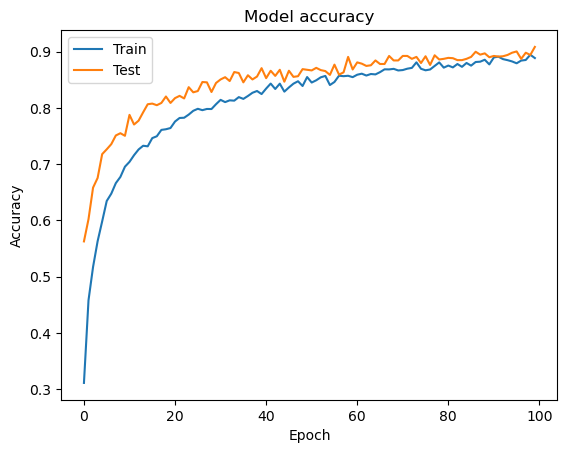

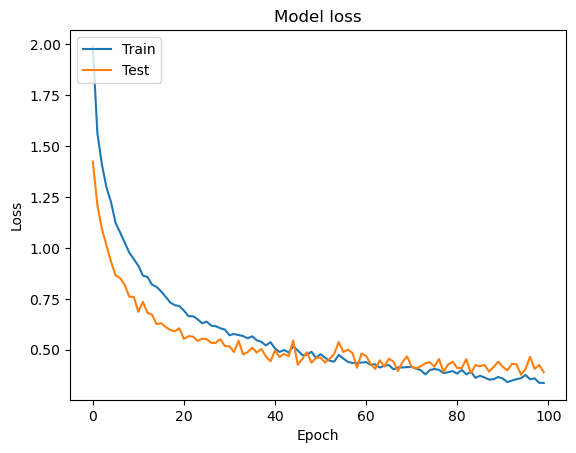

In [4]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [10]:
#Using ANN
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

accuracy_ANN = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy[1])

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 2.0254 - accuracy: 0.2929 - val_loss: 1.4716 - val_accuracy: 0.5467
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 1.5858 - accuracy: 0.4581 - val_loss: 1.2176 - val_accuracy: 0.6090
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 1.4053 - accuracy: 0.5148 - val_loss: 1.1191 - val_accuracy: 0.6531
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 1.3045 - accuracy: 0.5636 - val_loss: 1.0269 - val_accuracy: 0.6640
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 1.2377 - accuracy: 0.5831 - val_loss: 0.9494 - val_accuracy: 0.6863
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 1.1628 - accuracy: 0.6206 - val_loss: 0.9600 - val_accuracy: 0.6754
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 1.1300 - accuracy: 0.6242 - val_loss: 0.8877 - val_accuracy: 0.7029

Epoch 58/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.8537 - val_loss: 0.3981 - val_accuracy: 0.8775
Epoch 59/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4511 - accuracy: 0.8515 - val_loss: 0.4162 - val_accuracy: 0.8638
Epoch 60/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4340 - accuracy: 0.8564 - val_loss: 0.4107 - val_accuracy: 0.8689
Epoch 61/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.8541 - val_loss: 0.4262 - val_accuracy: 0.8655
Epoch 62/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4335 - accuracy: 0.8580 - val_loss: 0.3973 - val_accuracy: 0.8758
Epoch 63/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4363 - accuracy: 0.8551 - val_loss: 0.4219 - val_accuracy: 0.8729
Epoch 64/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8614 - val_loss: 0.4078 - val_accuracy:

In [11]:
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

accuracy_DNN = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy[1])

Epoch 1/100
219/219 [==============================] - 2s 3ms/step - loss: 2.4196 - accuracy: 0.2425 - val_loss: 1.5809 - val_accuracy: 0.4751
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 1.8813 - accuracy: 0.3582 - val_loss: 1.4030 - val_accuracy: 0.5461
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 1.6621 - accuracy: 0.4172 - val_loss: 1.3081 - val_accuracy: 0.5724
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 1.5559 - accuracy: 0.4624 - val_loss: 1.2320 - val_accuracy: 0.5839
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 1.4801 - accuracy: 0.4882 - val_loss: 1.1733 - val_accuracy: 0.6050
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 1.4460 - accuracy: 0.4991 - val_loss: 1.1356 - val_accuracy: 0.6245
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 1.4017 - accuracy: 0.5218 - val_loss: 1.0980 - val_accuracy: 0.6274

Epoch 58/100
219/219 [==============================] - 0s 2ms/step - loss: 0.9018 - accuracy: 0.7055 - val_loss: 0.5885 - val_accuracy: 0.8191
Epoch 59/100
219/219 [==============================] - 0s 2ms/step - loss: 0.8868 - accuracy: 0.7059 - val_loss: 0.6256 - val_accuracy: 0.7985
Epoch 60/100
219/219 [==============================] - 0s 2ms/step - loss: 0.8912 - accuracy: 0.7075 - val_loss: 0.6106 - val_accuracy: 0.8065
Epoch 61/100
219/219 [==============================] - 0s 2ms/step - loss: 0.8929 - accuracy: 0.7098 - val_loss: 0.5974 - val_accuracy: 0.8100
Epoch 62/100
219/219 [==============================] - 0s 2ms/step - loss: 0.8938 - accuracy: 0.7088 - val_loss: 0.6001 - val_accuracy: 0.8128
Epoch 63/100
219/219 [==============================] - 0s 2ms/step - loss: 0.8924 - accuracy: 0.7058 - val_loss: 0.6007 - val_accuracy: 0.8094
Epoch 64/100
219/219 [==============================] - 0s 2ms/step - loss: 0.8504 - accuracy: 0.7190 - val_loss: 0.5964 - val_accuracy:

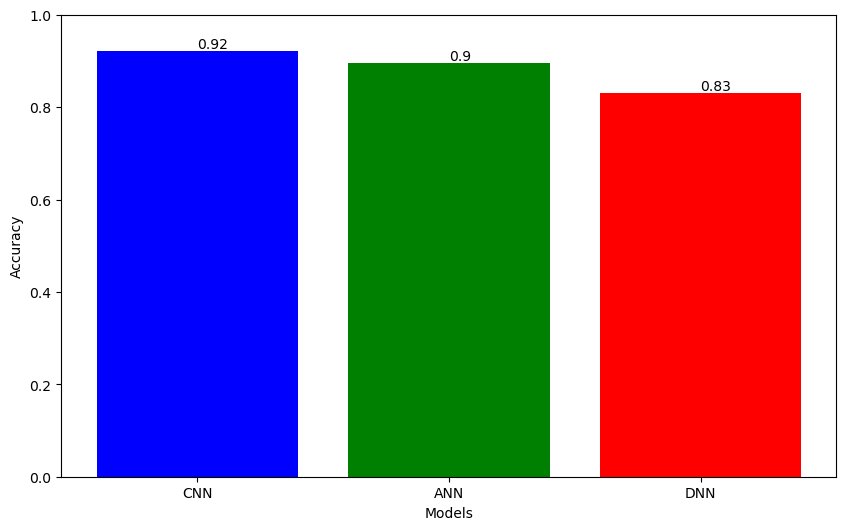

In [14]:
import matplotlib.pyplot as plt

# Accuracy scores of each model
accuracy_scores = {
    "CNN": accuracy_CNN[1],  # Accuracy score of model_WWD
    "ANN": accuracy_ANN[1],  # Accuracy score of model_ANN
    "DNN": accuracy_DNN[1]   # Accuracy score of model_DNN
}

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red'])
#plt.title('Accuracy of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 (for accuracy)

# Adding text labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.show()
